In [40]:
# define the filename
filename <- "iris.csv"
# load the CSV file from the local directory
dataset <- read.csv(filename, header=FALSE)
head(dataset)

V1,V2,V3,V4,V5,V6
Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [41]:
dim(dataset)

[1] 151   6

In [42]:
# set the column names in the dataset
colnames(dataset) <- c("id","Sepal.Length","Sepal.Width","Petal.Length","Petal.Width","Species")


2.3. Create a Validation Dataset

We need to know that the model we created is any good.

Later, we will use statistical methods to estimate the accuracy of the models that we create on unseen data. We also want a more concrete estimate of the accuracy of the best model on unseen data by evaluating it on actual unseen data.
That is, we are going to hold back some data that the algorithms will not get to see and we will use this data to get a second and independent idea of how accurate the best model might actually be.

We will split the loaded dataset into two, 80% of which we will use to train our models and 20% that we will hold back as a validation dataset.

In [43]:
library(caret)

In [44]:
# create a list of 80% of the rows in the original dataset we can use for training
validation_index <- createDataPartition(dataset$Species, p=0.80, list=FALSE)


Warning message in createDataPartition(dataset$Species, p = 0.8, list = FALSE):
"Some classes have a single record ( Species ) and these will be selected for the sample"

In [45]:
# select 20% of the data for validation
validation <- dataset[-validation_index,]
dim(validation)

[1] 30  6

In [46]:
# use the remaining 80% of data to training and testing the models
dataset <- dataset[validation_index,]
dim(dataset)

[1] 121   6

3.2 Types of Attributes

It is a good idea to get an idea of the types of the attributes. They could be doubles, integers, strings, factors and other types.

Knowing the types is important as it will give you an idea of how to better summarize the data you have and the types of transforms you might need to use to prepare the data before you model it.

In [47]:

# list types for each attribute
sapply(dataset, class)

id Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
    "factor"     "factor"     "factor"     "factor"     "factor"     "factor"

In [48]:

# take a peek at the first 5 rows of the data
head(dataset)

id,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


3.4 Levels of the Class

The class variable is a factor. A factor is a class that has multiple class labels or levels. Let’s look at the levels:

In [49]:
# list the levels for the class
levels(dataset$Species)

[1] "Iris-setosa"     "Iris-versicolor" "Iris-virginica"  "Species"

3.5 Class Distribution

Let’s now take a look at the number of instances (rows) that belong to each class. We can view this as an absolute count and as a percentage.

In [50]:
# summarize the class distribution
percentage <- prop.table(table(dataset$Species)) * 100
cbind(freq=table(dataset$Species), percentage=percentage)

,freq,percentage
Iris-setosa,40,33.0578512
Iris-versicolor,40,33.0578512
Iris-virginica,40,33.0578512
Species,1,0.8264463


In [51]:
summary(dataset)

       id       Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
 1      :  1   5.0    :10    3.0    :21   1.4    :11    0.2    :22  
 10     :  1   6.3    : 9    2.8    :10   1.5    :10    1.3    :10  
 101    :  1   5.1    : 7    3.1    :10   1.6    : 7    1.5    : 8  
 104    :  1   5.5    : 7    3.2    :10   5.1    : 7    1.8    : 8  
 105    :  1   5.7    : 6    3.4    :10   5.6    : 6    2.3    : 8  
 11     :  1   6.7    : 6    2.7    : 7   1.3    : 5    1.4    : 7  
 (Other):115   (Other):76    (Other):53   (Other):75    (Other):58  
            Species  
 Iris-setosa    :40  
 Iris-versicolor:40  
 Iris-virginica :40  
 Species        : 1  
                     
                     
                     

4. Visualize Dataset

We now have a basic idea about the data. We need to extend that with some visualizations.

We are going to look at two types of plots:

Univariate plots to better understand each attribute.
Multivariate plots to better understand the relationships between attributes.

4.1 Univariate Plots

We start with some univariate plots, that is, plots of each individual variable.

It is helpful with visualization to have a way to refer to just the input attributes and just the output attributes. Let’s set that up and call the inputs attributes x and the output attribute (or class) y.

In [52]:
# split input and output
x <- dataset[,1:4]
y <- dataset[,5]

In [53]:
# boxplot for each attribute on one image
par(mfrow=c(1,4))
  for(i in 1:4) {
  boxplot(x[,i], main=names(iris)[i])
}

ERROR: Error in oldClass(stats) <- cl: adding class "factor" to an invalid object


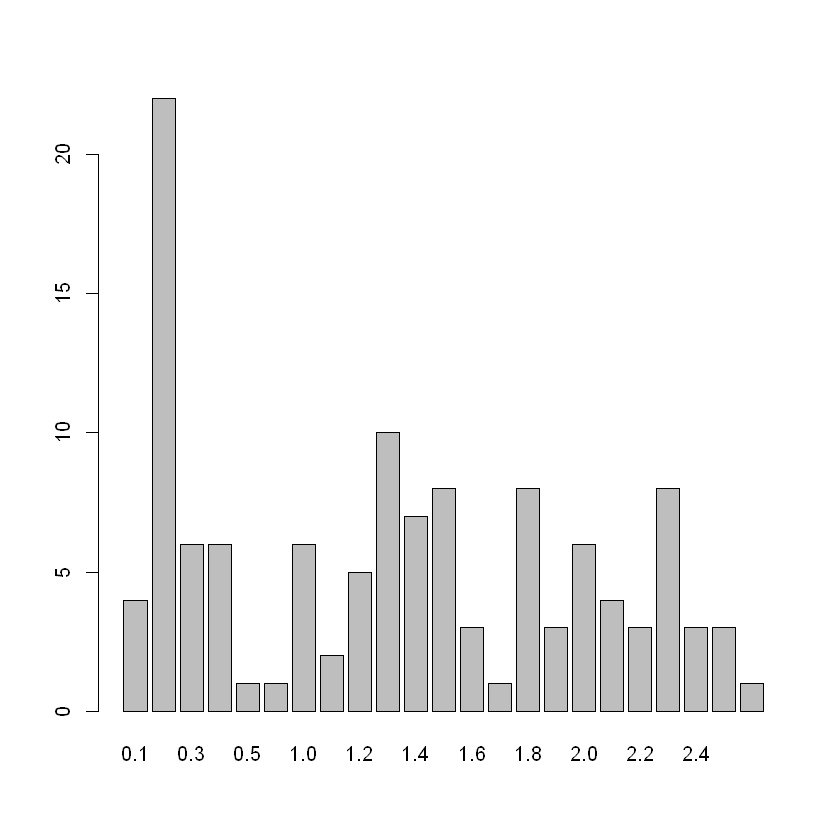

In [54]:

# barplot for class breakdown
plot(y)

4.2 Multivariate Plots

Now we can look at the interactions between the variables.

First let’s look at scatterplots of all pairs of attributes and color the points by class. In addition, because the scatterplots show that points for each class are generally separate, we can draw ellipses around them.

In [55]:
# scatterplot matrix
featurePlot(x=x, y=y, plot="ellipse")

ERROR: Error in stack.data.frame(x): no vector columns were selected


In [56]:
# box and whisker plots for each attribute
featurePlot(x=x, y=y, plot="box")

ERROR: Error in stack.data.frame(x): no vector columns were selected


5. Evaluate Some Algorithms

Now it is time to create some models of the data and estimate their accuracy on unseen data.

Here is what we are going to cover in this step:

Set-up the test harness to use 10-fold cross validation.
Build 5 different models to predict species from flower measurements
Select the best model.

5.1 Test Harness

We will 10-fold crossvalidation to estimate accuracy.

This will split our dataset into 10 parts, train in 9 and test on 1 and release for all combinations of train-test splits. We will also repeat the process 3 times for each algorithm with different splits of the data into 10 groups, in an effort to get a more accurate estimate.



In [ ]:
# Run algorithms using 10-fold cross validation
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

5.2 Build Models

We don’t know which algorithms would be good on this problem or what configurations to use. We get an idea from the plots that some of the classes are partially linearly separable in some dimensions, so we are expecting generally good results.

Let’s evaluate 5 different algorithms:

Linear Discriminant Analysis (LDA)
Classification and Regression Trees (CART).
k-Nearest Neighbors (kNN).
Support Vector Machines (SVM) with a linear kernel.
Random Forest (RF)
This is a good mixture of simple linear (LDA), nonlinear (CART, kNN) and complex nonlinear methods (SVM, RF). We reset the random number seed before reach run to ensure that the evaluation of each algorithm is performed using exactly the same data splits. It ensures the results are directly comparable.

Let’s build our five models:

In [ ]:
# a) linear algorithms
set.seed(7)
fit.lda <- train(Species~., data=dataset, method="lda", metric=metric, trControl=control)
# b) nonlinear algorithms
# CART
set.seed(7)
fit.cart <- train(Species~., data=dataset, method="rpart", metric=metric, trControl=control)
# kNN
set.seed(7)
fit.knn <- train(Species~., data=dataset, method="knn", metric=metric, trControl=control)
# c) advanced algorithms
# SVM
set.seed(7)
fit.svm <- train(Species~., data=dataset, method="svmRadial", metric=metric, trControl=control)
# Random Forest
set.seed(7)
fit.rf <- train(Species~., data=dataset, method="rf", metric=metric, trControl=control)


5.3 Select Best Model

We now have 5 models and accuracy estimations for each. We need to compare the models to each other and select the most accurate.

We can report on the accuracy of each model by first creating a list of the created models and using the summary function.



In [ ]:
# summarize accuracy of models
results <- resamples(list(lda=fit.lda, cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results)

We can also create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. There is a population of accuracy measures for each algorithm because each algorithm was evaluated 10 times (10 fold cross validation).



In [ ]:
# compare accuracy of models
dotplot(results)

In [ ]:

# summarize Best Model
print(fit.lda)

6. Make Predictions

The LDA was the most accurate model. Now we want to get an idea of the accuracy of the model on our validation set.

This will give us an independent final check on the accuracy of the best model. It is valuable to keep a validation set just in case you made a slip during such as overfitting to the training set or a data leak. Both will result in an overly optimistic result.

We can run the LDA model directly on the validation set and summarize the results in a confusion matrix.

In [ ]:

# estimate skill of LDA on the validation dataset
predictions <- predict(fit.lda, validation)
confusionMatrix(predictions, validation$Species)